In [2]:
from keras.datasets import boston_housing
(train_data,train_label),(test_data,test_label)=boston_housing.load_data()

57344/57026 [==============================] - 0s 8us/step


In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [17]:
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data-=mean
train_data/=std
test_data -= mean
test_data /= std

In [23]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(64,activation='relu',input_shape=(13,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])


In [24]:
import numpy as np
k=4
num_val_samples=len(test_data)//k
num_epochs = 100
all_scores = []


In [25]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_label[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_label[:i * num_val_samples],
    train_label[(i + 1) * num_val_samples:]],
    axis=0)
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [26]:
all_scores

[2.2958338260650635,
 1.5245012044906616,
 1.2882516384124756,
 1.3319751024246216]

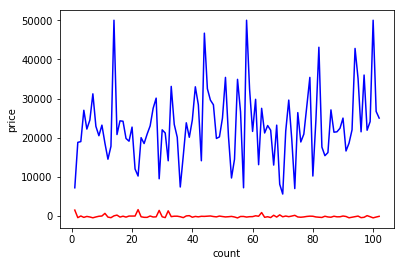

In [40]:
result=model.predict(test_data)
import matplotlib.pyplot as plt
xval=range(1,len(test_label)+1)
plt.plot(xval,test_label*1000,'b')
plt.plot(xval,result,'r')
plt.xlabel('count')
plt.ylabel('price')
plt.show()



In [39]:
print(train_label*1000)
print(result)

[15200. 42300. 50000. 21100. 17700. 18500. 11300. 15600. 15600. 14400.
 12100. 17900. 23100. 19900. 15700.  8800. 50000. 22500. 24100. 27500.
 10900. 30800. 32900. 24000. 18500. 13300. 22900. 34700. 16600. 17500.
 22300. 16100. 14900. 23100. 34900. 25000. 13900. 13100. 20400. 20000.
 15200. 24700. 22200. 16700. 12700. 15600. 18400. 21000. 30100. 15100.
 18700.  9600. 31500. 24800. 19100. 22000. 14500. 11000. 32000. 29400.
 20300. 24400. 14600. 19500. 14100. 14300. 15600. 10500.  6300. 19300.
 19300. 13400. 36400. 17800. 13500. 16500.  8300. 14300. 16000. 13400.
 28600. 43500. 20200. 22000. 23000. 20700. 12500. 48500. 14600. 13400.
 23700. 50000. 21700. 39800. 38700. 22200. 34900. 22500. 31100. 28700.
 46000. 41700. 21000. 26600. 15000. 24400. 13300. 21200. 11700. 21700.
 19400. 50000. 22800. 19700. 24700. 36200. 14200. 18900. 18300. 20600.
 24600. 18200.  8700. 44000. 10400. 13200. 21200. 37000. 30700. 22900.
 20000. 19300. 31700. 32000. 23100. 18800. 10900. 50000. 19600.  5000.
 14400